## MODULO 2 ESTADISTICAS


## CARGA DE DATOS
*PICKLE.LOAD
*NUMPYGENFROMTXT

In [292]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import random
import pickle as pkl

In [293]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [294]:
array = np.array([10, 9, 8, 7, 6])

# versión rápida y eficiente | saca la media el método np.mean
mean_np = np.mean(array)
print(f"Promedio con NumPy: {mean_np}")

# versión rudimentaria
mean = sum(array)/len(array)
print(f"Promedio rudimentario: {mean}")

# versión aún más rudimentaria
tamaño = 0
suma = 0
for num in array:
    tamaño +=1
    suma += num

media = suma/tamaño
print(f"Promedio aún más rudimentario: {media}")

Promedio con NumPy: 8.0
Promedio rudimentario: 8.0
Promedio aún más rudimentario: 8.0


In [295]:
# versión rápida y eficiente
median_np = np.median(array)
print(f"Mediana con NumPy: {median_np}")

# versión rudimentaria
sorted_array = sorted(array)
length = len(array)
middle = length//2

if length%2 == 0:
    elem1 = array[middle - 1]
    elem2 = array[middle]
    
    median = (elem1 + elem2)/2
else:
    median = array[middle]
    
print(f"Mediana rudimentario: {median}")

Mediana con NumPy: 8.0
Mediana rudimentario: 8


In [296]:
# versión rápida y eficiente
median_np = np.median(array)
print(f"Mediana con NumPy: {median_np}")

# versión rudimentaria
sorted_array = sorted(array)
length = len(array)
middle = length//2

if length%2 == 0:
    elem1 = array[middle - 1]
    elem2 = array[middle]
    
    median = (elem1 + elem2)/2
else:
    median = array[middle]
    
print(f"Mediana rudimentario: {median}")

Mediana con NumPy: 8.0
Mediana rudimentario: 8


In [297]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
    city_consumption = pkl.load(f)
    
city_consumption


array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [298]:
# Usamos la COLUMNA 8 CON USECOLS

city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1,dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
print(city_consumption) 

[ 9.9 11.2  6.  ... 13.4 12.9 14.9]


In [299]:
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str) # añadimos el dtype=str para que lea la marca sino nois sale en NAN

print(manufacturers) 

['ACURA' 'ACURA' 'ACURA' ... 'VOLVO' 'VOLVO' 'VOLVO']


In [300]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}") #MEDIA
print(f"Consumo medio en ciudad: {np.around(np.mean(road_consumption),2):.2f}")


Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 9.47


In [301]:
print(f"Mediana combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana combustible en carretera: {np.median(road_consumption)}")

Mediana combustible en ciudad: 12.600000381469727
Mediana combustible en carretera: 8.800000190734863


In [302]:
print(f"Coche que más consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más consume  en carretera: {np.max(road_consumption)}")

Coche que más consume en ciudad: 30.200000762939453
Coche que más consume  en carretera: 20.5


In [303]:
print(f"Coche que más consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que más consume  en carretera: {np.min(road_consumption)}")

Coche que más consume en ciudad: 4.599999904632568
Coche que más consume  en carretera: 4.900000095367432


## HISTOGRAMAS

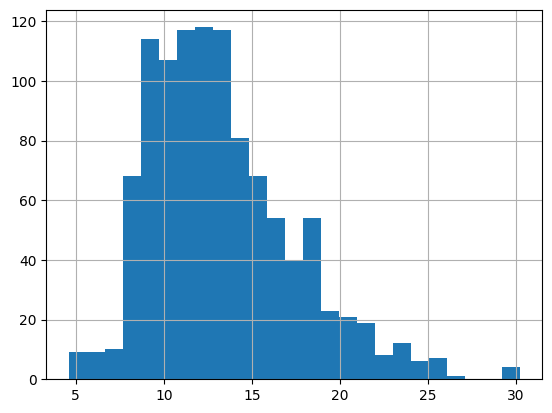

In [256]:
plt.hist(city_consumption, bins=25)
plt.grid()

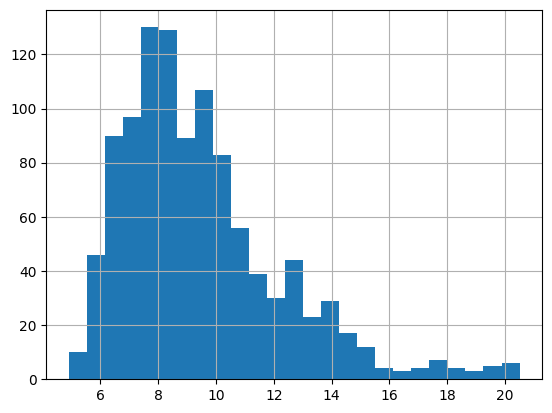

In [257]:
plt.hist(road_consumption, bins=25)
plt.grid()

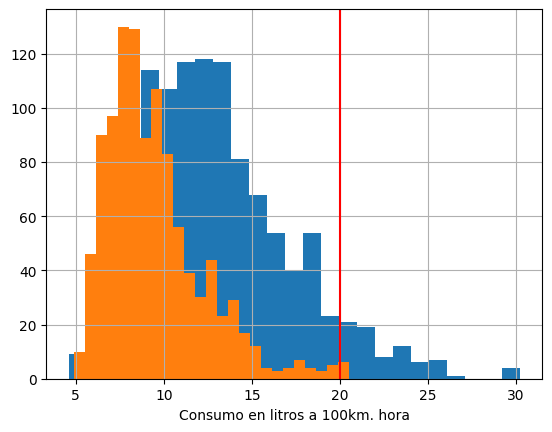

In [258]:
plt.hist(city_consumption, bins=25)
plt.hist(road_consumption, bins=25)
plt.xlabel("Número de coches")
plt.axvline( 20, color= "red")
plt.xlabel("Consumo en litros a 100km. hora")
plt.grid()

## CUARTILES

In [259]:
print(np.quantile(a =city_consumption, q =0.5, interpolation = "lower"))
print(np.median(city_consumption))

12.6
12.6


In [260]:
print(np.quantile(a =city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower"))

# Primer cuartil (Q1): 10,2L/100km - El 25% de los coches consumen menos de 10,2 litros
# Primer cuartil (Q2): 12,6L/100km - El 50% de los coches consumen menos de 12,6 litros
# Primer cuartil (Q3): 15,5L/100km - El 75% de los coches consumen menos de 15,5 litros
# Esto nos interesa para poder detectar valores anómalos

[10.2 12.6 15.5]


In [261]:
# filtros de mascaras
city_consumption[city_consumption >= 26] #aqui nos dice la cantidad de coches que consumen más o igual a 26 litrosb


array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [262]:
# Rango
print(f"Rango consumo  ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")

Rango consumo  ciudad: 25.600000381469727
Rango consumo carretera: 15.600000381469727


###  iqr


In [263]:
#Rango intercuartilico o IQR va bien para sacar los valores anomalos
# lo usamos para calcular valores que sean anómalos, y están muy alejados de ese 50% central de los datos
# Como están distribuidos los datos alrededor de la mediana
# 1.5 veces IQR alejado se puede considerar un outlier o valor anómalo
Q1 = np.quantile(a =city_consumption, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a =city_consumption, q =  0.75, interpolation = "lower")

IQR = Q3 -Q1
print(IQR)



5.3


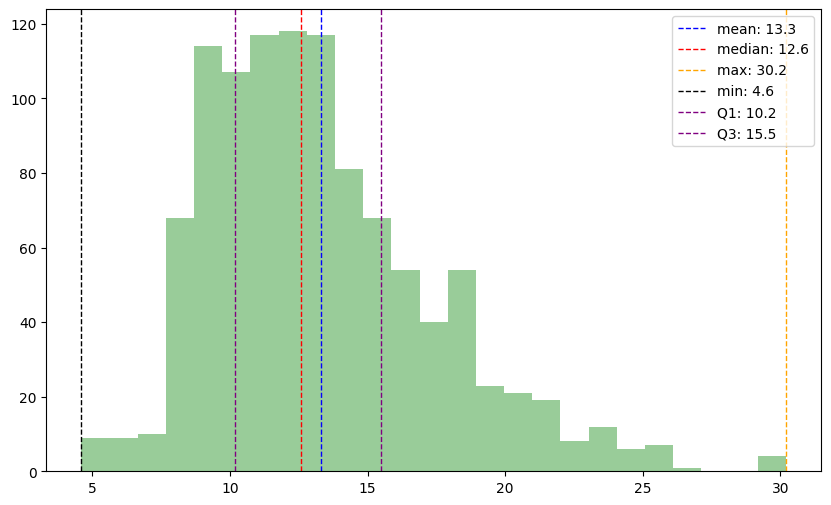

In [264]:
# Pintar media, mediana, Q1, Q2, Q3,min, max en eun histograma

city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_Q1 = np.quantile(a =city_consumption, q = 0.25, interpolation = "lower")
city_Q3 = np.quantile(a =city_consumption, q =  0.75, interpolation = "lower")
plt.figure(figsize=(10,6))
plt.hist(city_consumption, bins=25, color="green", alpha=0.4)
plt.axvline(city_mean, color="blue", linestyle="dashed", linewidth=1, label=f"mean: {city_mean:.1f}")
plt.axvline(city_median, color="red", linestyle="dashed", linewidth=1, label=f"median: {city_median:.1f}")
plt.axvline(city_max, color="orange", linestyle="dashed", linewidth=1, label=f"max: {city_max:.1f}")
plt.axvline(city_min, color="black", linestyle="dashed", linewidth=1, label=f"min: {city_min:.1f}")
plt.axvline(city_Q1, color="purple", linestyle="dashed", linewidth=1, label=f"Q1: {city_Q1:.1f}")
plt.axvline(city_Q3, color="purple", linestyle="dashed", linewidth=1, label=f"Q3: {city_Q3:.1f}")
plt.legend()
plt.show()



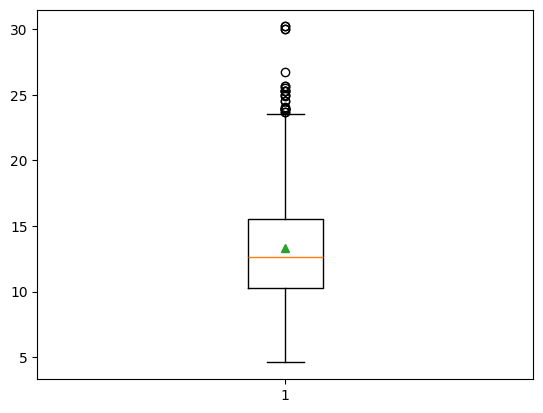

In [265]:
# boxplot | con el punto y coma no enseña el texto, este boxplot es igual a  lo de ARRIBA   
# Los puntos negros son los valres anómalos, outliners
plt.boxplot(city_consumption, showmeans=True);

## FILTRAR DATOS

In [266]:
# Filtrando usando percentiles
#print(np.quantile(city_consumption, 0.5))
#print(np.percentile(city_consumption, 10))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {percentil_10}") # Esto es 10% de los coches que menos consumen
print(f"percentil 90: {percentil_90}")

# Coches en el 10% inferior ( 10% de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10% coches que más concumen
coches_mayor_consumo = city_consumption[city_consumption <= percentil_90]

print("10 % coches de menor consumo")
print(f"media: {np.mean(coches_menor_consumo)}")

print("10 % coches de mayor consumo")
print(f"media: {np.mean(coches_mayor_consumo)}")

percentil 10: 8.699999809265137
percentil 90: 18.799999237060547
10 % coches de menor consumo
media: 7.8307013511657715
10 % coches de mayor consumo
media: 12.364137649536133


## DISPERSIÓN
* SE USA LA DESVIACIÓN ESTANDAR


In [267]:
# Medir la dispersión de los consumos con respecto a la media

np.var(city_consumption)

np.float32(16.804516)

In [268]:
# desviación standar : raíz cuadrada de la varianza
np.std(city_consumption)
# de media , los consumos se desvían 4,1 litros de media

np.float32(4.0993314)

In [269]:
# Puedes analizar los 5 fabricantes que más coches tiene este dataset

from collections import Counter
contador = Counter(manufacturers)

top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")


Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


In [270]:
fabricantes, conteos = zip(*top_10) # se puede hacer con un for guardando en dos listas independientes

print(fabricantes)
print(conteos)

(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


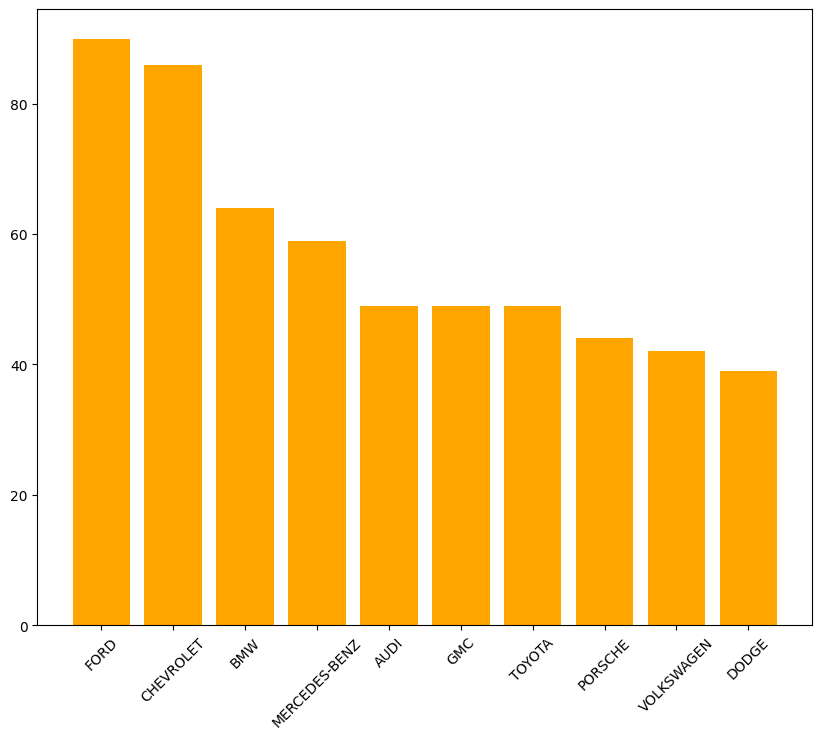

In [271]:

plt.figure(figsize=(10, 8))
plt.bar(fabricantes, conteos, color="orange")
plt.xticks(rotation=45); # rotamos los nombres para poder leerlo bien y no se monten unos con otros


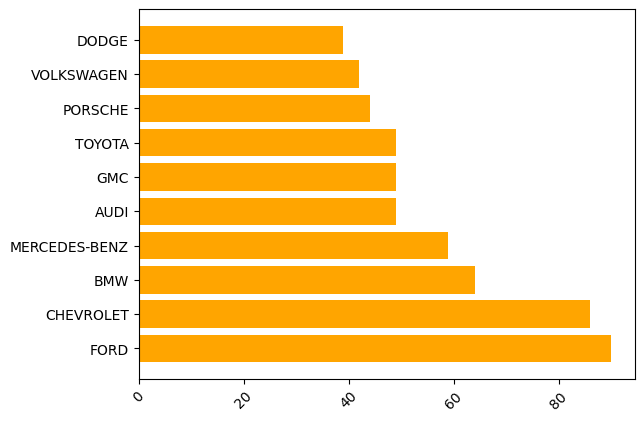

In [272]:
#plt.figure(figsize=(10, 8))
plt.barh(fabricantes, conteos, color="orange")
plt.xticks(rotation=45); # rotamos los nombres para poder leerlo bien y no se monten unos con otros



## OUTLIERS METODOS

## FILTRO OUTLIERS CON IQR

In [273]:
#metodo para ver outliers

def filtrar_outliers(array, k=1.5):
      # calcular el Q1
    Q1 = np.percentile(array, 25)
     # calcular el Q3
    Q3 = np.percentile(array, 75) 
     # calcular IQR
    IQR = Q3 - Q1
   # filtro de 1.5 veces el IQR para limite inferior y limite superior
    limite_inferior = Q1 - IQR * k
    print(f"limite inferior {limite_inferior}")
   
    limite_superior = Q3 + IQR * k
    print(f"limite superior {limite_superior}")
   # Nos quedamos solo  con lo que está entre el limite inferior y el limite superior
    array_sin_outliers = array[(array >= limite_inferior) & (array <= limite_superior)] 
   
    # retornar array_filtrado
    return array_sin_outliers
    

In [274]:
#array_sin_outliers = filtrar_outliers(city_consumption, k=1.3)
city_consumption_no_outliers = filtrar_outliers(city_consumption, k=1.3)
print(city_consumption.shape)
print(city_consumption_no_outliers.shape)

limite inferior 3.3600001335144043
limite superior 22.440000534057617
(1067,)
(1036,)


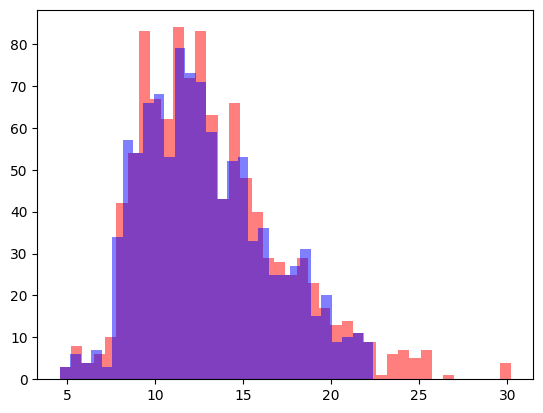

In [291]:
plt.hist(city_consumption, bins=40, color= "red", alpha= 0.5)
plt.hist(city_consumption_no_outliers, bins=30, color= "blue", alpha= 0.5);


## CORRELACIÓN

In [276]:

# VAMOS A COMPROBAR LAS VARIACIONES DE SI A MÁS CILINDROS MAYOR CONSUMO Y EMISIONES

city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1,dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
co2_emisiones = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1, dtype=np.float32)
cylinders = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.float32)
engine_cc = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emisiones)
print(cylinders)
print(engine_cc)



[196. 221. 136. ... 271. 260. 294.]
[4. 4. 4. ... 6. 6. 6.]
[2 2 1 ... 3 3 3]


In [277]:
stats.pearsonr(cylinders, city_consumption)[0] # Contra más cerca de 1 correlación positiva si fuera 0 no hay correlación, -1 correlación negativa

# np.float64(0.7964725642795258) lo interpretariamos como una relación positiva entre cilindros y consumo de combustible en ciudad
# Es decir cuántos más cilindros mayor consumo

np.float64(0.7964725642795258)

In [278]:
# Calcular todas las correlaciones para la columna y cylinders

print(f" cylinders/cylinders{stats.pearsonr(cylinders, cylinders)[0]}")
print(f" cylinders/city_consumption{stats.pearsonr(cylinders, city_consumption)[0]}")
print(f" cylinders/road_consumption{stats.pearsonr(cylinders, road_consumption)[0]}")
print(f" cylinders/engine_cc{stats.pearsonr(cylinders, engine_cc)[0]}")
print(f" cylinders/co2_emisiones{stats.pearsonr(cylinders, co2_emisiones)[0]}")

 cylinders/cylinders0.9999998099956429
 cylinders/city_consumption0.7964725642795258
 cylinders/road_consumption0.7245935094435936
 cylinders/engine_cc0.9186342166899522
 cylinders/co2_emisiones0.8496844776288413


In [279]:
print(f" co2_emisiones/cylinders{stats.pearsonr(co2_emisiones, cylinders)[0]}")
print(f" co2_emisiones/city_consumption{stats.pearsonr(co2_emisiones, city_consumption)[0]}")
print(f" co2_emisiones/city_consumption{stats.pearsonr(co2_emisiones, city_consumption)[0]}")
print(f" co2_emisiones/road_consumption{stats.pearsonr(co2_emisiones, road_consumption)[0]}")
print(f" co2_emisiones/engine_cc{stats.pearsonr(co2_emisiones, engine_cc)[0]}")
print(f" co2_emisiones/co2_emisiones{stats.pearsonr(co2_emisiones, co2_emisiones)[0]}")

 co2_emisiones/cylinders0.8496844868028859
 co2_emisiones/city_consumption0.89803846285443
 co2_emisiones/city_consumption0.89803846285443
 co2_emisiones/road_consumption0.861747933020979
 co2_emisiones/engine_cc0.8715961775756682
 co2_emisiones/co2_emisiones0.9999999198823106


## MATRIZ DE CORRELACIÓN

In [316]:
# ESTO ES UNA LISTA DE LISTAS

columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emisiones] # 5 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)
        
    

[[1.         0.83020841 0.775931   0.91863424 0.87159619]
 [0.8302084  0.99999996 0.96571824 0.79647258 0.89803847]
 [0.77593099 0.96571823 1.         0.72459352 0.86174794]
 [0.91863422 0.79647256 0.72459351 0.99999981 0.84968448]
 [0.87159618 0.89803846 0.86174793 0.84968449 0.99999992]]


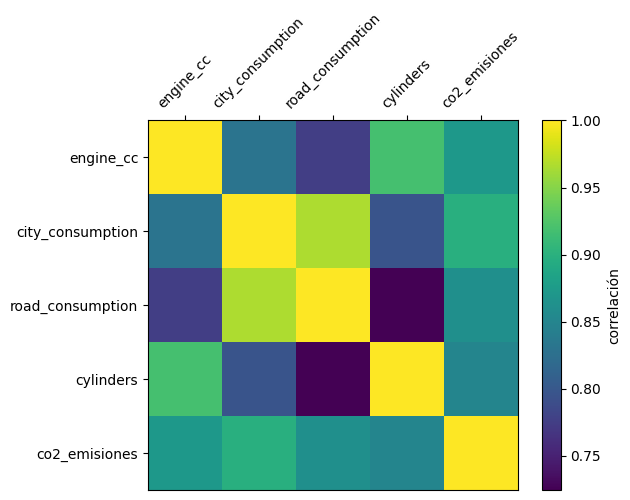

In [317]:
column_names = ["engine_cc", "city_consumption", "road_consumption", "cylinders", "co2_emisiones"]
plt.imshow(matriz, cmap="viridis")
plt.colorbar(label= "correlación")
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position("top")

In [320]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

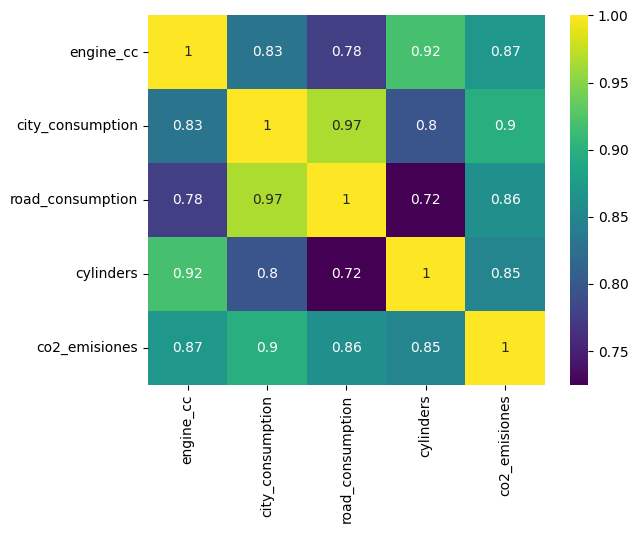

In [318]:
import seaborn as sns
sns.heatmap(matriz, annot=True, cmap="viridis", xticklabels=column_names, yticklabels=column_names)

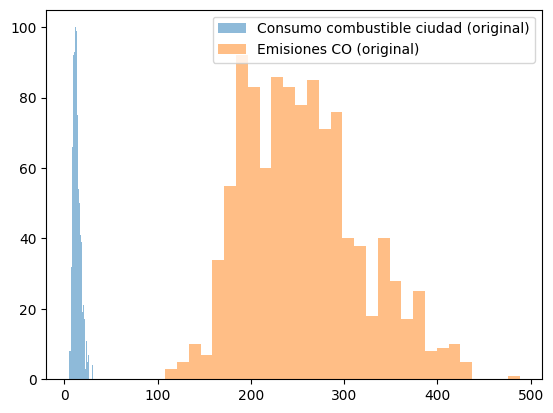

In [319]:
plt.hist(city_consumption, bins=30, alpha=0.5, label="Consumo combustible ciudad (original)")
plt.hist(co2_emisiones, bins=30, alpha=0.5, label="Emisiones CO (original)")
plt.legend();


## ESTANDARIZACIÓN

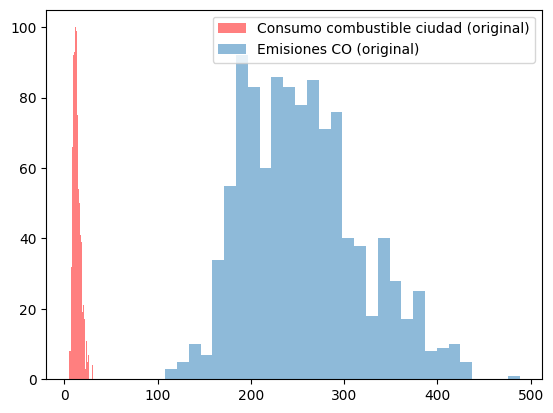

In [285]:
# Estandarizar y pintar histograma


media_con = np.mean(city_consumption)
desv_con = np.std(city_consumption)
media_co2 = np.mean(co2_emisiones)

resultado1 = [(x -media_con) /desv_con for x in city_consumption]
resultado2 = [(x -media_co2) / desv_con for x in co2_emisiones]

plt.hist(city_consumption, bins=30, color="red", alpha=0.5, label="Consumo combustible ciudad (original)")
plt.hist(co2_emisiones, bins=30, alpha=0.5, label="Emisiones CO (original)")
plt.legend()

In [321]:
#Estandarizar y pintar el histograma


mean_city_consumption = np.mean(city_consumption)
mean_co2_emisiones = np.mean(co2_emisiones)

median_city_consumption = np.median(city_consumption)
median_co2_emisiones = np.median(co2_emisiones)

std_city_consumption = np.std(city_consumption)
std_co2_emisiones = np.std(co2_emisiones)

print(f"Media original city_consumption: {mean_city_consumption}")
print(f"Mediana original city_consumption: {median_city_consumption}")
print(f"Desviación ewstandar original city_consumption: {std_city_consumption}")

print(f"Media original city_consumption: {mean_co2_emisiones}")
print(f"Mediana original city_consumption: {median_co2_emisiones}")
print(f"Desviación ewstandar original city_consumption: {std_co2_emisiones}")

Media original city_consumption: 13.29653263092041
Mediana original city_consumption: 12.600000381469727
Desviación ewstandar original city_consumption: 4.099331378936768
Media original city_consumption: 256.2286682128906
Mediana original city_consumption: 251.0
Desviación ewstandar original city_consumption: 63.34259796142578


In [287]:
city_consumption_standard = (city_consumption - mean_city_consumption) / std_city_consumption
co2_emisiones_standard = (co2_emisiones - mean_co2_emisiones) / std_co2_emisiones

print(city_consumption_standard[:5])
print(co2_emisiones_standard[:5])

[-0.8285578  -0.5114329  -1.7799324  -0.14551954 -0.29188472]
[-0.9508399  -0.55616075 -1.8980697  -0.01939719 -0.19305599]


In [288]:
#Estandarizar y pintar el histograma

mean_city_consumption = np.mean(city_consumption_standard)
mean_co2_emisiones = np.mean(co2_emisiones_standard)

median_city_consumption = np.median(city_consumption_standard)
median_co2_emisiones = np.median(co2_emisiones_standard)

std_city_consumption = np.std(city_consumption_standard)
std_co2_emisiones = np.std(co2_emisiones_standard)

print(f"Media original city_consumption: {mean_city_consumption}")
print(f"Mediana original city_consumption: {median_city_consumption}")
print(f"Desviación ewstandar original city_consumption: {std_city_consumption}")

print(f"Media original city_consumption: {mean_co2_emisiones}")
print(f"Mediana original city_consumption: {median_co2_emisiones}")
print(f"Desviación ewstandar original city_consumption: {std_co2_emisiones}")

Media original city_consumption: -7.150323000360004e-08
Mediana original city_consumption: -0.1699136197566986
Desviación ewstandar original city_consumption: 0.9999999403953552
Media original city_consumption: 1.6445743256099377e-07
Mediana original city_consumption: -0.08254584670066833
Desviación ewstandar original city_consumption: 1.0


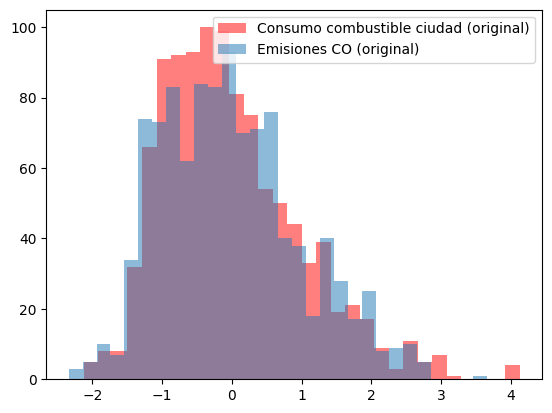

In [289]:
plt.hist(city_consumption_standard, bins=30, color="red", alpha=0.5, label="Consumo combustible ciudad (original)")
plt.hist(co2_emisiones_standard, bins=30, alpha=0.5, label="Emisiones CO (original)")
plt.legend()

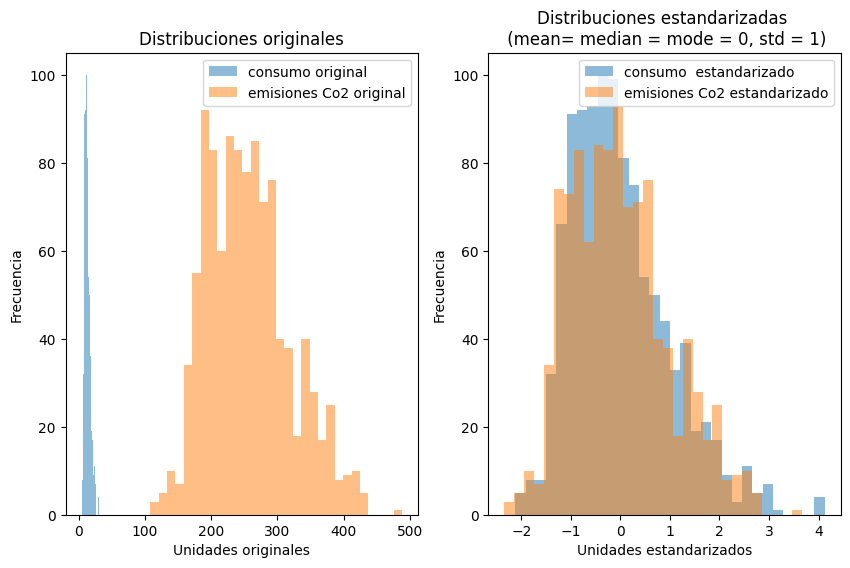

In [323]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1) # primer grafico
plt.hist(city_consumption, bins=30, alpha= 0.5, label= "consumo original")
plt.hist(co2_emisiones, bins=30, alpha= 0.5, label= "emisiones Co2 original")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend();

plt.subplot(1, 2, 2) # segundo grafico
plt.hist(city_consumption_standard, bins=30, alpha= 0.5, label= "consumo  estandarizado")
plt.hist(co2_emisiones_standard, bins=30, alpha= 0.5, label= "emisiones Co2 estandarizado")
plt.title("Distribuciones estandarizadas \n (mean= median = mode = 0, std = 1)")
plt.xlabel("Unidades estandarizados")
plt.ylabel("Frecuencia")
plt.legend();